In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

# "Lab" 13: Practicalities

This week we will develop some practical skills for the third part of the project, and any potential data work you do in the future. We will cover a lot of ground, and provide some links for futher reading along the way.

As a running example, we will seek to replicate the first graphs I showed you in class, which plotted gun ownership and gun deaths across US states and different countries.

## Part 1. Finding data

There is no magical formula for finding data out there, though something close may be "use google."

A good formula if you are looking for one variable is to search for "[description of variable] by [level of observation] data". You may can also trying using "table" or "csv" instead of or in addition to "data". 

If you are interested in a particular time period/country/etc. you can add that to the search as well.

For example, when I search for "gun deaths by us state" <a href="https://www.cdc.gov/nchs/pressroom/sosmap/firearm_mortality/firearm.htm">this</a> is the first source that comes up.

Follow the link and poke around a bit. Note it produces some maps, which is nice, but we want the raw data. Fortunately there is a "Download Data (csv)" button. Click that, which will download the file for you.

If you go to the folder where downloads go, and double click on the file, it will probably try to open it in Excel or a text editor. 

Next we will put this on datahub so we can import it in a notebook. Before that, some more general tips:
- Of cousre we want to be sure that our data come from reliable sources. There are no absolute rules here, but a government site like the CDC is probably pretty trustworthy. If this was a serious research project we would want to consult multiple sources and check they are consistent, if possible. 
- A good source for political science data is <a href="https://www.icpsr.umich.edu/web/pages/">ICPSR</a>.
- If you are struggling to find data you are looking for, reach out to your Professors or GSIs: we will often have a good sense of where to search or who to go ask.

## Part 2. Getting data on the datahub.

You may have noticed that whenever we are working on notebooks there is a "jupyterhub" icon in the top left corner. This is a super valuable resources provided for members of the Berkeley community where we can use Python and other programming langauges through our browsers. It also makes it easy for me to share notebooks with you!

As you may know, you have a "personal" datahub site that includes all of the files we have worked on in this class, and potentially some others from other classes you have taken. 

Open a new browser tab/winder and go to datahub.berkeley.edu. You should see a folder called "PolSci-88-FA21". If you click this, it will take you to a directory with all of the work we have done so far in class. Pause for a moment to be proud of all the work you have done!

Now click on the "lab13" folder. That folder should contain a file called Lab13.ipynb: that is this file right here. There is also a folder called "data". Click on that, which at the moment is empty. 

Now we want to upload the data file. There is a button near the top right called Upload. Click that, and then find the data file you just downloaded. This creates a little dialog box with the current name of the file "undefined.csv". This is pretty uninformative, so go into the box and rename it "gundeaths.csv". Then click the blue upload button. Now it is up!

Any file you upload to datahub can be accessed by a notebook you are running on datahub. Though it is good practice to keep the data and the notebook that uses it in the same directory, or put the data in a subdirectory.



## Part 3. Loading the data

Now we are ready to run some code that will look familiar. We will use the `pd.read_csv` function. The only difference is that this time you were the one to put the data file where it needs to be! 

If you put the .csv file in the same directory as your notebook, you could load it up with `pd.read_csv("gundeaths.csv")`. That is, by default this function will "look" for the data file in the same directory as the notebook. Since we put it in a folder called "data", we instead load it up with:

In [2]:
gd = pd.read_csv("data/gundeaths.csv")
gd

,YEAR,STATE,RATE,DEATHS,URL
0,2019,AL,22.2,1076,/nchs/pressroom/states/alabama/al.htm
1,2019,AK,24.4,179,/nchs/pressroom/states/alaska/ak.htm
2,2019,AZ,15.1,1136,/nchs/pressroom/states/arizona/az.htm
3,2019,AR,19.3,580,/nchs/pressroom/states/arkansas/ar.htm
4,2019,CA,7.2,2945,/nchs/pressroom/states/california/ca.htm
...,...,...,...,...,...
345,2005,VA,11.5,888,/nchs/pressroom/states/virginia/virginia.htm
346,2005,WA,8.8,567,/nchs/pressroom/states/washington/washington.htm
347,2005,WV,13.8,261,/nchs/pressroom/states/westvirginia/westvirgin...
348,2005,WI,8.5,474,/nchs/pressroom/states/wisconsin/wisconsin.htm


Notice there are 350 rows here, corresponding to 7 years for of data for 50 states (no DC here, alas).

The `DEATHS` column is a raw count of gun deaths, while `RATE` is the gun deaths per 100,000 residents (making some adjustments for differences in age, which we don't need to worry about). It will generally be better to work with these rates: if we don't adjust for population we may just find that there are more guns deaths in states with more guns just because both are correlated with population.

We can do some general exploratory analysis on the trends of gun deaths by year:

<AxesSubplot:xlabel='YEAR', ylabel='RATE'>

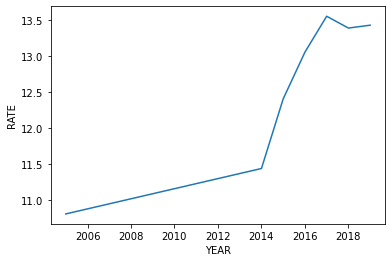

In [143]:
sns.lineplot(x='YEAR', y='RATE', data=gd, ci=None)

The reason the line is straight for a while is that there is a "gap" in the data from 2005 to 2014:

In [144]:
gd['YEAR'].value_counts()

2019    50
2018    50
2017    50
2016    50
2015    50
2014    50
2005    50
Name: YEAR, dtype: int64

We can plot some individual states:

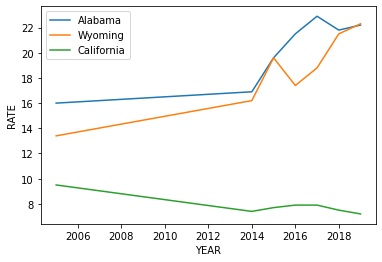

In [145]:
sns.lineplot(x='YEAR', y='RATE', data=gd[gd.STATE=="AL"], ci=None, label="Alabama")
sns.lineplot(x='YEAR', y='RATE', data=gd[gd.STATE=="WY"], ci=None, label="Wyoming")
sns.lineplot(x='YEAR', y='RATE', data=gd[gd.STATE=="CA"], ci=None, label="California")
plt.legend()

Pick out a few more states and make a plot of how the gun death rate evolved over this time window.

## Merging on one variable

Now we have one of our variables, and for multiple years. Let's see what we can find on gun ownership. Some quick googling turns up <a href="https://worldpopulationreview.com/state-rankings/gun-ownership-by-state">this</a> site. It only has data for 2021 (more on this later), but it does have a nice downloadable .csv file.

Like before, download this, and then upload it to the lab13/data folder with the name "gunowner2021.csv". Now we can load it up with the following.

In [6]:
go = pd.read_csv("data/gunowner2021.csv")
go

,State,gunOwnership,totalGuns
0,Montana,0.663,22133
1,Wyoming,0.662,132806
2,Alaska,0.645,15824
3,Idaho,0.601,49566
4,West Virginia,0.585,35264
5,Arkansas,0.572,79841
6,Mississippi,0.558,35494
7,Alabama,0.555,161641
8,South Dakota,0.553,21130
9,North Dakota,0.551,13272


The "gun ownership" is a nice measure to compare with the gun homicide rate since both of them are adjusted for population size. Note there is huge heterogeneity in gun ownership across states!

<AxesSubplot:>

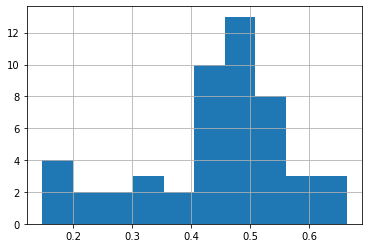

In [146]:
go['gunOwnership'].hist()

Now we want to combine the gun ownership data with the gun homicide data. There are a few challenges here:
- The gun ownership data is for 2021 and the gun homicide data has multiple years, ending in 2019. We will address this more later, but to keep things simple let's first try to get one dataframe that has the gun ownership data from 2021 and the gun homicide data from 2019. As we saw above, these tend to not dramatically change over time, so this will probably be reasonable to just get a sense of what the bivariate relationship looks like today.
- A more practical problem is that these two data sources name the states in different ways: one uses two digit postal codes ("CA"), while the other has the full state name ("California"). Humans who know the US postal codes can figure out which corresponds to which, but we would rather have a computer do this for us, but because it is faster and less error prone.

To solve the second problem, we are going to look for a third data set which provides a "translation" or "crosswalk" between the full state name and the two digit code. Googling "state name abbreviations" turns up <a href="https://worldpopulationreview.com/states/state-abbreviations">this</a> site, which has a csv file that contains both the full name and the abbreviation, as we want. Download this, and upload it to the same "data" folder with the name "crosswalk.csv".

Now we can load it up:

In [147]:
crosswalk = pd.read_csv("data/crosswalk.csv")
crosswalk

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


To keep things tidy, let's drop the "Abbrev" column which has an abbreviation which doesn't show up in either dataframe we are using. 

In [148]:
crosswalk = crosswalk.drop("Abbrev", axis=1)
crosswalk.head()

,State,Code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Now we are ready for our first merge, which will bring the two letter postal code into the gun ownership data (we could also start by merging the full name into the gun deaths data). 

Let's remind ourselves what the `go` dataframe looks like:

In [149]:
go.head()

,State,gunOwnership,totalGuns
0,Montana,0.663,22133
1,Wyoming,0.662,132806
2,Alaska,0.645,15824
3,Idaho,0.601,49566
4,West Virginia,0.585,35264


The simplest kinds of merges, like this one, correspond to cases where we have two dataframes where the rows correspond to the "same thing", here a state. Merging requires one or more variables to serve as a "key" which will tell us which rows correspond to the same case. To see what our key is, let's remind ourselves what the data frames look like:

In [12]:
crosswalk.head()

,State,Code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In merging our `go` dataframe with the `crosswalk` dataframe, our key will be the `State` variable, which corresponds to the full state name in both dataframes. Conveniently, it has the same column name in both dataframes; we will learn how to deal with the (very common) issue of different names in a bit. We will use the `pd.merge` function to combine the data from both columns, which in this case we can think of as adding the postal code to the gun ownership data. In general we will use four arguments when calling this function.
- The first two arguments are the names of the two dataframes. We will refer to the first one the left, and the second one the right
- Next we use an `on=` argument to say what key(s) to use to identify the rows.
- Finally, we use a `how=` argument which tells us what "kind" of merge to do. We will see more examples later, but first we will do a "left" merge, which will typically treat the first dataframe we entered as the "base" data frame, and then add the data from the right dataframe when available. Overall, here is the syntax for our first merge:

In [13]:
merge1 = pd.merge(go, crosswalk, on="State", how="left")
merge1.head()

,State,gunOwnership,totalGuns,Code
0,Montana,0.663,22133,MT
1,Wyoming,0.662,132806,WY
2,Alaska,0.645,15824,AK
3,Idaho,0.601,49566,ID
4,West Virginia,0.585,35264,WV


Comparing across the "State" and "Code" variables, this seems to have worked! 

A good thing to check whenever doing a merge is the total number of rows/columns in the original and merged data files. We can do this with the `.shape` function.

In [14]:
go.shape

(50, 3)

In [15]:
crosswalk.shape

(51, 2)

This tells us that the gun ownership data file had 50 observations, while the crosswalk had 51. If you go and look at the crosswalk we can see why (if you can't already guess): the crosswalk also includes DC, while the gun ownership data does not. How did our "left" merge deal with this? Let's check the shape of the merged dataframe:

In [16]:
merge1.shape

(50, 4)

Like the gun onwership ("left") dataframe, we only have 50 observations. This is because a "left" merge effectively says "you can drop cases where we don't have data in the left dataframe", which in this case means we don't create a row with DC because we have no gun ownership data. 

Let's see what happens if we do a "right" merge by changing our "how" argument.

In [17]:
merge2 = pd.merge(go, crosswalk, on="State", how="right")
merge2.shape

(51, 4)

Now we have 51 rows! Let's see what this looks like:

In [18]:
merge2

,State,gunOwnership,totalGuns,Code
0,Alabama,0.555,161641.0,AL
1,Alaska,0.645,15824.0,AK
2,Arizona,0.463,179738.0,AZ
3,Arkansas,0.572,79841.0,AR
4,California,0.283,344622.0,CA
5,Colorado,0.451,92435.0,CO
6,Connecticut,0.236,82400.0,CT
7,Delaware,0.344,4852.0,DE
8,District of Columbia,NaN,NaN,DC
9,Florida,0.353,343288.0,FL


Note this includes a row for DC, which includes the name and postal code -- the "data" from the crosswalk, or the right dataframe -- but no gun ownership data. Instead, we get a NaN, meaning there is no data. Sometimes it will be useful to have the "larger" dataframe with no data for some rows, but for our purposes we would just end up ignoring DC anyways since we don't have data on one of our key variables.

There are other types of merges that are useful for other purposes ("inner" and "outer"), but left and right will be enough for our purposes. It won't matter for what we do next, but let's stick with merge1, which doesn't add the DC row.

Next, we want to bring in the gun death data. Let's remind ourselves what this looks like:

In [19]:
gd.head()

,YEAR,STATE,RATE,DEATHS,URL
0,2019,AL,22.2,1076,/nchs/pressroom/states/alabama/al.htm
1,2019,AK,24.4,179,/nchs/pressroom/states/alaska/ak.htm
2,2019,AZ,15.1,1136,/nchs/pressroom/states/arizona/az.htm
3,2019,AR,19.3,580,/nchs/pressroom/states/arkansas/ar.htm
4,2019,CA,7.2,2945,/nchs/pressroom/states/california/ca.htm


A few things to note:
- This dataframe also contains multiple years for each state. In the next line we will subset to the "closest" year to our gun ownership data, which is 2019. 
- The column names here are in all caps
- There are a couple columns we don't need: `URL` which contains the source, and `DEATHS`, which is the raw count of gun deaths, while we want to look at the rate.

We are going to take a few steps to clean this up before merging. First, let's create a new dataframe with just the 2019 data.

In [155]:
gd2019 = gd[gd.YEAR == 2019]
gd2019.shape

(50, 5)

Let's also drop the URL and also the year (the dataframe name already reminds us this is just for 2019)

In [156]:
gd2019 = gd2019.drop(["URL", "YEAR"], axis=1)

In [157]:
gd2019.head()

,STATE,RATE,DEATHS
0,AL,22.2,1076
1,AK,24.4,179
2,AZ,15.1,1136
3,AR,19.3,580
4,CA,7.2,2945


Now we want to merge this with our `merge1` dataframe. Let's remind ourselves what this looks like:

In [158]:
merge1.head()

,State,gunOwnership,totalGuns,Code
0,Montana,0.663,22133,MT
1,Wyoming,0.662,132806,WY
2,Alaska,0.645,15824,AK
3,Idaho,0.601,49566,ID
4,West Virginia,0.585,35264,WV


The "key" we can use to identify each row within the two datafiles is the two letter postal code. But note this time it is named "STATE" in the gun death data and "Code" in the gun ownership data. We can do merges with different column names, but I think it is tidier to first rename one of the columns to match the other. In this case, let's rename "STATE" to "Code" in the gun death data (since there is already a "State" variable in the gun ownership data).

We can do this with the `rename` function applied to the dataframe. To just rename one variable, we use `df.rename({'OLDNAME':'NEWNAME'}, axis=1)`. Think of the argument in curly brackets as the "dictionary" telling us the mapping from old to new names. The `axis=1` argument clarifies that we are renaming columns and no rows. Let's first check that this works:

In [159]:
gd2019.rename({'STATE':"Code"}, axis=1)

,Code,RATE,DEATHS
0,AL,22.2,1076
1,AK,24.4,179
2,AZ,15.1,1136
3,AR,19.3,580
4,CA,7.2,2945
5,CO,14.2,846
6,CT,5.3,190
7,DE,9.9,93
8,FL,12.7,2872
9,GA,15.8,1695


In [160]:
gd2019=gd2019.rename({'STATE':"Code"}, axis=1)

I find it useful when doing things like renaming variables to fist just run a line of code like df.rename or df.drop, and see what the dataframe it produces looks like. When it returns what I want, then I edit the line of code to either create a new dataframe (df2 = df.rename...) or overwrite the first one (df=df.rename...)

Now we are ready to merge the gun deaths and gun onwership data on the key "Code". Let's give it an informative name:

In [161]:
own_and_death = pd.merge(merge1, gd2019, on="Code", how="left")
own_and_death.shape

(50, 6)

We still have 50 observations, which is good. And we now have both gun ownership and gun deaths (`RATE`)

In [162]:
own_and_death.head()

,State,gunOwnership,totalGuns,Code,RATE,DEATHS
0,Montana,0.663,22133,MT,19.0,209
1,Wyoming,0.662,132806,WY,22.3,133
2,Alaska,0.645,15824,AK,24.4,179
3,Idaho,0.601,49566,ID,14.2,255
4,West Virginia,0.585,35264,WV,16.6,300


Finally, let's reward our hard work by making a scatterplot with gun ownership on the x axis and gun deaths on the y axis:

<AxesSubplot:xlabel='gunOwnership', ylabel='RATE'>

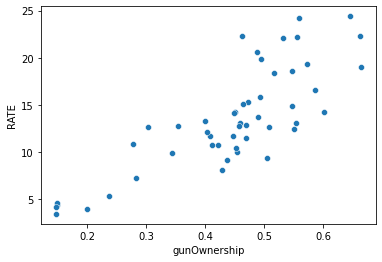

In [163]:
sns.scatterplot(x='gunOwnership',y="RATE", data=own_and_death)

Looks a lot like the graph I showed in the first lecture!

Create a similar plot with `totalGuns` on the x axis and `Deaths` on the y axis. Is this relationship stronger? Why?

<AxesSubplot:xlabel='totalGuns', ylabel='DEATHS'>

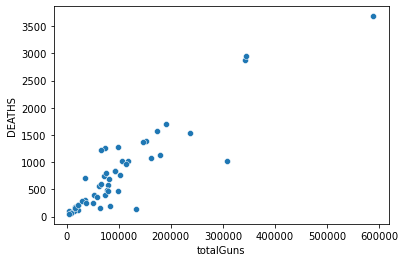

In [164]:
sns.scatterplot(x='totalGuns',y="DEATHS", data=own_and_death)

## Merging on two variables

There are at least two unsatisfying things about the analysis above. First, we only have one year of data for each state. Second, they aren't even from the same year.

To rectify this, and learn some more about merging along the way, we will import some data created by the Rand Corporation. (To tie together another theme of class, Rand was also an early hotbed of research on Game Theory in the mid 20th century.)

The data come from <a href="https://www.rand.org/research/gun-policy/gun-ownership.html">here</a> but are in a slightly more annoying format, so I cleaned it up and uploaded it to my Box drive and then made a publicly shareable link, which is a useful method for sharing.

In [29]:
rand_gunown = pd.read_csv("https://berkeley.box.com/shared/static/ptgqciox16mibfkcbs2af8ny85okmyyo.csv")
rand_gunown.shape

(1850, 3)

There are lots of rows here and just three columns. Let's take a closer look:

In [30]:
rand_gunown

,Year,STATE,HFR
0,1980,Alabama,0.608
1,1981,Alabama,0.597
2,1982,Alabama,0.661
3,1983,Alabama,0.586
4,1984,Alabama,0.624
...,...,...,...
1845,2012,Wyoming,0.597
1846,2013,Wyoming,0.613
1847,2014,Wyoming,0.608
1848,2015,Wyoming,0.549


The "HFR" is an estimate of gun ownership, using some convoluted methods which we won't delve into. Note we have data for multiple years. Let's see which:

In [31]:
rand_gunown['Year'].value_counts()

1980    50
1999    50
2001    50
2002    50
2003    50
2004    50
2005    50
2006    50
2007    50
2008    50
2009    50
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2000    50
1998    50
1981    50
1997    50
1982    50
1983    50
1984    50
1985    50
1986    50
1987    50
1988    50
1989    50
1990    50
1991    50
1992    50
1993    50
1994    50
1995    50
1996    50
2016    50
Name: Year, dtype: int64

The order is a bit goofy here, but we have 1980-2016. Let's remind ourselves about the gun death range:

In [32]:
gd.columns

Index(['YEAR', 'STATE', 'RATE', 'DEATHS', 'URL'], dtype='object')

In [33]:
gd['YEAR'].value_counts()

2019    50
2018    50
2017    50
2016    50
2015    50
2014    50
2005    50
Name: YEAR, dtype: int64

The overlap here is far from perfect, but it does give us four years with both gun onwership and gun death data. Let's combine these.

Like before, our gun ownership and gun deaths data have different ways of identifying states, even though the column names match!

In [34]:
rand_gunown.head()

,Year,STATE,HFR
0,1980,Alabama,0.608
1,1981,Alabama,0.597
2,1982,Alabama,0.661
3,1983,Alabama,0.586
4,1984,Alabama,0.624


In [35]:
gd.head()

,YEAR,STATE,RATE,DEATHS,URL
0,2019,AL,22.2,1076,/nchs/pressroom/states/alabama/al.htm
1,2019,AK,24.4,179,/nchs/pressroom/states/alaska/ak.htm
2,2019,AZ,15.1,1136,/nchs/pressroom/states/arizona/az.htm
3,2019,AR,19.3,580,/nchs/pressroom/states/arkansas/ar.htm
4,2019,CA,7.2,2945,/nchs/pressroom/states/california/ca.htm


Let's start with the gun deaths and rename the `STATE` column to `Code` to match our crosswalk. We also will get rid of the all caps for others.

In [36]:
gd_clean = gd.rename({"YEAR":"Year", "STATE":"Code", "RATE":"Deathrate"}, axis=1)
gd_clean

,Year,Code,Deathrate,DEATHS,URL
0,2019,AL,22.2,1076,/nchs/pressroom/states/alabama/al.htm
1,2019,AK,24.4,179,/nchs/pressroom/states/alaska/ak.htm
2,2019,AZ,15.1,1136,/nchs/pressroom/states/arizona/az.htm
3,2019,AR,19.3,580,/nchs/pressroom/states/arkansas/ar.htm
4,2019,CA,7.2,2945,/nchs/pressroom/states/california/ca.htm
...,...,...,...,...,...
345,2005,VA,11.5,888,/nchs/pressroom/states/virginia/virginia.htm
346,2005,WA,8.8,567,/nchs/pressroom/states/washington/washington.htm
347,2005,WV,13.8,261,/nchs/pressroom/states/westvirginia/westvirgin...
348,2005,WI,8.5,474,/nchs/pressroom/states/wisconsin/wisconsin.htm


... and drop the DEATHS and URL

In [37]:
gd_clean = gd_clean.drop(["DEATHS", "URL"], axis=1)
gd_clean

,Year,Code,Deathrate
0,2019,AL,22.2
1,2019,AK,24.4
2,2019,AZ,15.1
3,2019,AR,19.3
4,2019,CA,7.2
...,...,...,...
345,2005,VA,11.5
346,2005,WA,8.8
347,2005,WV,13.8
348,2005,WI,8.5


Let's remember what the crosswalk looks like:

In [38]:
crosswalk.head()

,State,Code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Now we can do a merge between our cleaned gun death dataframe and the crosswalk, using the "Code" as a key. 

Note an interesting difference between these two merges. The `gd_clean` has 350 entries because there are multiple years, while `crosswalk` just has 50 (well, 51, but DC is going to get dropped) entries. But if we input `gd_clean` as our first dataframe and use `how=left`, and `on=Code`, it will think of the `gd_clean` as a dataframe where each row corresponds to a state, where we happen to have multiple years of data. So for each row, we just pull the "Code" from the crosswalk.

In [39]:
gd_withcode = pd.merge(gd_clean, crosswalk, on="Code", how="left")
gd_withcode.shape

(350, 4)

In [40]:
gd_withcode

,Year,Code,Deathrate,State
0,2019,AL,22.2,Alabama
1,2019,AK,24.4,Alaska
2,2019,AZ,15.1,Arizona
3,2019,AR,19.3,Arkansas
4,2019,CA,7.2,California
...,...,...,...,...
345,2005,VA,11.5,Virginia
346,2005,WA,8.8,Washington
347,2005,WV,13.8,West Virginia
348,2005,WI,8.5,Wisconsin


Now we just need to clean up the `rand_gunown` a bit. In particular, let's rename `STATE` to `State`.

In [41]:
rand_gunown = rand_gunown.rename({"STATE":"State"}, axis=1)

To combine these two dataframes, we need to use *two* keys, since we want to make sure we match the gun ownership/deaths by year and state. So our two keys iwll be the state name (`State`) and the year (`Year`). We can do this by inputting an array with both column names in the `on` argument. Let's do this is a left merge with `gd_withcode` as our left dataframe, which we can think of as "adding" the gun ownership to this data.

In [43]:
sy_left = pd.merge(gd_withcode, rand_gunown, on=["State", "Year"], how="left")

Let's compare the shape of our inputs and outputs:

In [44]:
gd_withcode.shape, rand_gunown.shape, sy_left.shape

((350, 4), (1850, 3), (350, 5))

Note the shape matches our left dataframe. In this case, we can think of this as only including the years where we have gun deaths data. If we did a right merge we would keep all cases where we have gun ownership but not gun deaths:

In [45]:
sy_right = pd.merge(gd_withcode, rand_gunown, on=["State", "Year"], how="right")
sy_right.shape

(1850, 5)

Just to see one more example, if we use `how="inner"` the resulting dataframe will only include state-years where we have data on both gun ownership and gun deaths:

In [46]:
sy_inner = pd.merge(gd_withcode, rand_gunown, on=["State", "Year"], how="inner")
sy_inner.shape

(200, 5)

Which makes sense because there are four years of overlap, and 50 states per year.

Another useful diagnostic is to check how many NaN entries there are in our "new" data. For the left merge, this is the HFR variable.

In [47]:
sy_left.head()

,Year,Code,Deathrate,State,HFR
0,2019,AL,22.2,Alabama,NaN
1,2019,AK,24.4,Alaska,NaN
2,2019,AZ,15.1,Arizona,NaN
3,2019,AR,19.3,Arkansas,NaN
4,2019,CA,7.2,California,NaN


The `isna()` function returns True for NaN and False otherwise. So we can sum up `sy_left.HFR.isna()` to  count how many NaNs are in the column.

In [48]:
np.sum(sy_left.HFR.isna())

150

So 3 years don't have gun ownership data.

We can also count NaN's by year with the `pd.crosstab` function:

In [50]:
pd.crosstab(sy_left.Year, sy_left.HFR.isna())

HFR,False,True
Year,,
2005,50,0
2014,50,0
2015,50,0
2016,50,0
2017,0,50
2018,0,50
2019,0,50


We can now do a scatterplot with multiple years of data, with actual overlap in the year:

<AxesSubplot:xlabel='HFR', ylabel='Deathrate'>

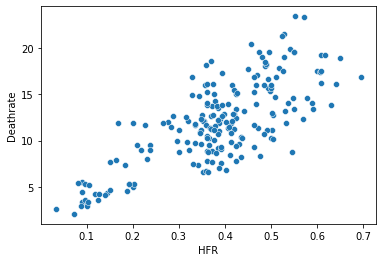

In [51]:
sns.scatterplot(x='HFR', y='Deathrate', data=sy_left)

And run a regression

In [53]:
smf.ols("Deathrate ~ HFR", data=sy_left).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Deathrate   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     269.9
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           7.89e-39
Time:                        07:40:10   Log-Likelihood:                -498.44
No. Observations:                 200   AIC:                             1001.
Df Residuals:                     198   BIC:                             1007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3569      0.619      3.810      0.000       1.137       3.577
HFR           25.0684      1.526     16.428      0.000      22.059      28.078
==============================================================================
Omnibus:                        3.078   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.905
Skew:                           0.229   Prob(JB):                        0.234
Kurtosis:                       2.628   Cond. No.                         8.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note we get the same result using the `sy_inner` dataframe since `smf.ols` will drop cases with missing data (NaN) on any of the variables.

In [55]:
smf.ols("Deathrate ~ HFR", data=sy_inner).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Deathrate   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     269.9
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           7.89e-39
Time:                        07:40:59   Log-Likelihood:                -498.44
No. Observations:                 200   AIC:                             1001.
Df Residuals:                     198   BIC:                             1007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3569      0.619      3.810      0.000       1.137       3.577
HFR           25.0684      1.526     16.428      0.000      22.059      28.078
==============================================================================
Omnibus:                        3.078   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.905
Skew:                           0.229   Prob(JB):                        0.234
Kurtosis:                       2.628   Cond. No.                         8.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

And run regressions with fixed effects.

In [57]:
smf.ols("Deathrate ~ HFR + Code + Year", data=sy_left).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Deathrate   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     61.69
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           5.85e-78
Time:                        07:41:06   Log-Likelihood:                -274.17
No. Observations:                 200   AIC:                             652.3
Df Residuals:                     148   BIC:                             823.9
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -335.9510     36.269     -9.263      0.000    -407.623    -264.279
Code[T.AL]    -1.1101      0.828     -1.340      0.182      -2.747       0.526
Code[T.AR]    -2.6883      0.841     -3.197      0.002      -4.350      -1.026
Code[T.AZ]    -2.9434      1.054     -2.792      0.006      -5.027      -0.860
Code[T.CA]    -6.5853      1.544     -4.266      0.000      -9.636      -3.535
Code[T.CO]    -5.0417      1.037     -4.863      0.000      -7.090      -2.993
Code[T.CT]    -9.9442      1.491     -6.669      0.000     -12.891      -6.997
Code[T.DE]    -6.2086      1.151     -5.394      0.000      -8.483      -3.934
Code[T.FL]    -4.8211      1.251     -3.853      0.000      -7.294      -2.348
Code[T.GA]    -4.0850      1.024     -3.991      0.000      -6.108      -2.062
Code[T.HI]    -9.9679      1.840     -5.419      0.000     -13.603      -6.333
Code[T.IA]    -9.6328      1.078     -8.937      0.000     -11.763      -7.503
Code[T.ID]    -6.1622      0.792     -7.780      0.000      -7.727      -4.597
Code[T.IL]    -6.0044      1.389     -4.322      0.000      -8.750      -3.259
Code[T.IN]    -5.2689      0.985     -5.349      0.000      -7.215      -3.322
Code[T.KS]    -6.7401      0.986     -6.839      0.000      -8.688      -4.793
Code[T.KY]    -4.4860      0.845     -5.308      0.000      -6.156      -2.816
Code[T.LA]     0.4588      0.849      0.540      0.590      -1.219       2.136
Code[T.MA]   -10.2466      1.775     -5.771      0.000     -13.755      -6.738
Code[T.MD]    -4.0843      1.443     -2.831      0.005      -6.935      -1.234
Code[T.ME]    -9.7394      0.927    -10.509      0.000     -11.571      -7.908
Code[T.MI]    -5.9765      1.075     -5.559      0.000      -8.101      -3.852
Code[T.MN]   -10.4210      1.058     -9.854      0.000     -12.511      -8.331
Code[T.MO]    -2.9565      0.854     -3.462      0.001      -4.644      -1.269
Code[T.MS]    -1.1041      0.832     -1.327      0.187      -2.749       0.540
Code[T.MT]    -3.9788      0.808     -4.927      0.000      -5.575      -2.383
Code[T.NC]    -4.5872      1.100     -4.171      0.000      -6.761      -2.414
Code[T.ND]    -8.6643      0.799    -10.838      0.000     -10.244      -7.084
Code[T.NE]    -8.8383      1.048     -8.435      0.000     -10.909      -6.768
Code[T.NH]    -9.5994      1.001     -9.590      0.000     -11.577      -7.621
Code[T.NJ]    -8.1167      1.781     -4.557      0.000     -11.637      -4.597
Code[T.NM]    -0.9920      1.047     -0.947      0.345      -3.062       1.078
Code[T.NV]    -1.5065      1.120     -1.345      0.181      -3.720       0.707
Code[T.NY]    -9.7222      1.631     -5.961      0.000     -12.945      -6.499
Code[T.OH]    -6.5790      1.031     -6.379      0.000      -8.617      -4.541
Code[T.OK]    -2.8059      0.842     -3.334      0.001      -4.469      -1.143
Co

This means that, even keeping fixed the fact that some states are generally more violent than others, higher gun ownership is still associated with more gun deaths. This could still be partly driven by reverse causation, but is stronger evidence than just looking one year at a time that there is something causal going on.

## Part 3: Your turn

Now let's do the same exercise but by country (and just for one year).

You can get data on gun ownership by country <a href="https://worldpopulationreview.com/country-rankings/gun-ownership-by-country">here</a> and gun homicides <a href="https://worldpopulationreview.com/country-rankings/gun-deaths-by-country">here</a>

See if you can:
- Download both in .csv format
- Upload the .csv files to your datahub folder
- Merge the two data files, using `.shape` to checking that the merge worked and how many countries have data from both files
- Create a scatterplot with gun ownership on the x axis and gun deaths on the y axis.

If you have time, create a new variable that indicates whether a country is in South America (either my merging in a new dataset of using the `isin()` function, and then make a graph that plots these in a different color. You can also see how excluding this region changes the results of a linear regression predicting gun deaths from gun ownership.

In [59]:
gunown_country = pd.read_csv("data/gunown_country.csv")
gunown_country.head()

,country,firearms,per100,military,lawEnf,pop2021
0,United States,393347000,120.5,4535380.0,1016000.0,332915.073
1,Falkland Islands,2000,62.1,NaN,30.0,3.533
2,Yemen,14859000,52.8,28500.0,NaN,30490.640
3,New Caledonia,115000,42.5,NaN,700.0,288.218
4,Montenegro,245000,39.1,5396.0,8000.0,628.053


In [60]:
gundeath_country = pd.read_csv("data/gundeath_country.csv")
gundeath_country.head()

,country,total,homicide,suicide,totalNumber
0,Honduras,60.00,66.64,0.41,5846.0
1,Venezuela,49.22,26.48,0.14,14036.0
2,El Salvador,45.60,26.49,0.13,2942.0
3,Eswatini,37.16,37.16,NaN,426.0
4,Guatemala,34.10,29.62,0.34,5993.0


In [61]:
gundeath_country.shape, gunown_country.shape

((73, 5), (216, 6))

In [63]:
countrydata = pd.merge(gundeath_country, gunown_country, on="country", how="left")
countrydata.shape

(73, 10)

In [65]:
countrydata.head()

,country,total,homicide,suicide,totalNumber,firearms,per100,military,lawEnf,pop2021
0,Honduras,60.00,66.64,0.41,5846.0,1171000.0,14.1,107720.0,29000.0,10062.991
1,Venezuela,49.22,26.48,0.14,14036.0,5895000.0,18.5,353300.0,173000.0,28704.954
2,El Salvador,45.60,26.49,0.13,2942.0,737000.0,12.0,127840.0,30000.0,6518.499
3,Eswatini,37.16,37.16,NaN,426.0,NaN,NaN,NaN,NaN,NaN
4,Guatemala,34.10,29.62,0.34,5993.0,2062000.0,12.1,160600.0,43000.0,18249.860


In [67]:
np.sum(countrydata['per100'].isna())

2

<AxesSubplot:xlabel='per100', ylabel='total'>

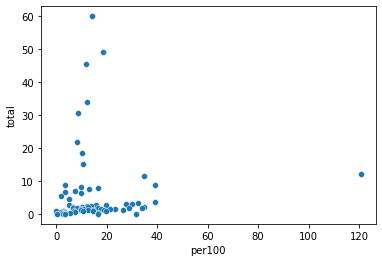

In [68]:
sns.scatterplot(x='per100', y="total", data=countrydata)

## Part 4: Reshaping

A lot of time the data we find online does not come in the right "shape". For example, we want our data here to be in a format where each row corresponds to a country/year (or state/year), with columns telling us which country and year the row corresponds to, and then the relevant variables for our analysis. We often call this "long" format, because with lots of combinations of countries/years the dataframes tend to get long. 

However, it is common for data to be in "wide" format, where each row corresponds to a state, and then there are different columns telling us the data values for each year. While the data we found so far was not in this format, we can simulate what this looks like by first making a pivot table (using the state level gun death data)

In [165]:
gd_clean.head()

,Year,Code,Deathrate
0,2019,AL,22.2
1,2019,AK,24.4
2,2019,AZ,15.1
3,2019,AR,19.3
4,2019,CA,7.2


In [166]:
gd_wide = gd_clean.pivot(index='Code', columns='Year', values='Deathrate')
gd_wide

Year,2005,2014,2015,2016,2017,2018,2019
Code,,,,,,,
AK,17.5,19.2,23.4,23.3,24.5,21.0,24.4
AL,16.0,16.9,19.6,21.5,22.9,21.8,22.2
AR,15.7,16.6,16.9,17.8,20.3,18.9,19.3
AZ,16.1,13.5,13.8,15.2,15.8,15.3,15.1
CA,9.5,7.4,7.7,7.9,7.9,7.5,7.2
CO,11.6,12.2,12.6,14.3,13.4,15.2,14.2
CT,5.3,5.0,5.3,4.6,5.1,4.9,5.3
DE,8.8,11.1,12.1,11.0,11.7,11.6,9.9
FL,10.0,11.5,12.0,12.6,12.4,12.9,12.7


Another potential wide format would have years as rows and different states as columns.

In [167]:
gd_wide2 = gd_clean.pivot(index='Year', columns='Code', values='Deathrate')
gd_wide2

Code,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,
2005,17.5,16.0,15.7,16.1,9.5,11.6,5.3,8.8,10.0,12.1,...,10.2,16.0,11.1,10.1,11.5,6.8,8.8,8.5,13.8,13.4
2014,19.2,16.9,16.6,13.5,7.4,12.2,5.0,11.1,11.5,13.7,...,10.3,15.1,10.7,12.3,10.3,10.3,9.7,8.2,14.6,16.2
2015,23.4,19.6,16.9,13.8,7.7,12.6,5.3,12.1,12.0,14.1,...,11.1,16.0,11.7,12.8,10.9,9.6,9.8,10.4,14.0,19.6
2016,23.3,21.5,17.8,15.2,7.9,14.3,4.6,11.0,12.6,15.0,...,13.4,17.1,12.1,12.9,12.1,11.1,9.0,11.4,17.5,17.4
2017,24.5,22.9,20.3,15.8,7.9,13.4,5.1,11.7,12.4,15.4,...,11.9,18.4,12.4,14.0,11.9,11.7,11.1,10.6,18.6,18.8
2018,21.0,21.8,18.9,15.3,7.5,15.2,4.9,11.6,12.9,15.7,...,13.6,17.8,12.2,13.2,11.8,12.8,10.4,10.1,18.2,21.5
2019,24.4,22.2,19.3,15.1,7.2,14.2,5.3,9.9,12.7,15.8,...,13.1,18.4,12.7,12.8,11.7,9.3,10.7,10.0,16.6,22.3


This is kind of useful because we can make plots by state easily (not that it's super hard in long format, where we just subset to the state we want).

<AxesSubplot:xlabel='Year', ylabel='CO'>

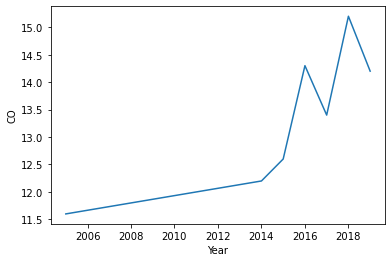

In [168]:
sns.lineplot(x="Year", y="CO", data=gd_wide2)

Making the data as a pivot table creates a dataframe with some weird properties. If we had downloaded data as a .csv in wide format and then imported it we would get something more like this (don't worry about the details here).

In [169]:
gd_widedf = pd.DataFrame(gd_wide.to_records())
gd_widedf

,Code,2005,2014,2015,2016,2017,2018,2019
0,AK,17.5,19.2,23.4,23.3,24.5,21.0,24.4
1,AL,16.0,16.9,19.6,21.5,22.9,21.8,22.2
2,AR,15.7,16.6,16.9,17.8,20.3,18.9,19.3
3,AZ,16.1,13.5,13.8,15.2,15.8,15.3,15.1
4,CA,9.5,7.4,7.7,7.9,7.9,7.5,7.2
5,CO,11.6,12.2,12.6,14.3,13.4,15.2,14.2
6,CT,5.3,5.0,5.3,4.6,5.1,4.9,5.3
7,DE,8.8,11.1,12.1,11.0,11.7,11.6,9.9
8,FL,10.0,11.5,12.0,12.6,12.4,12.9,12.7
9,GA,12.1,13.7,14.1,15.0,15.4,15.7,15.8


To translate something like this back into "long" format, we can use the `pd.melt` function. This takes at least three arguments:
- the wide dataframe
- the variabe in the wide dataframe column name that identifies cases, as `idvars=`. Here this will be "code"
- An array with the wide dataframe column names that have the data, which here are the years.

In [170]:
gd_longagain = pd.melt(gd_widedf, id_vars="Code", value_vars=['2005', '2014', '2015', '2016', '2017', '2018', '2019'])
gd_longagain

,Code,variable,value
0,AK,2005,17.5
1,AL,2005,16.0
2,AR,2005,15.7
3,AZ,2005,16.1
4,CA,2005,9.5
...,...,...,...
345,VT,2019,9.3
346,WA,2019,10.7
347,WI,2019,10.0
348,WV,2019,16.6


A trick to make this a bit more consice is to create an array with the relevant columns:

In [171]:
gd_widedf.columns

Index(['Code', '2005', '2014', '2015', '2016', '2017', '2018', '2019'], dtype='object')

In [173]:
datacols = gd_widedf.columns[1:10]
datacols

Index(['2005', '2014', '2015', '2016', '2017', '2018', '2019'], dtype='object')

In [174]:
gd_longagain = pd.melt(gd_widedf, id_vars="Code", value_vars=datacols)
gd_longagain

,Code,variable,value
0,AK,2005,17.5
1,AL,2005,16.0
2,AR,2005,15.7
3,AZ,2005,16.1
4,CA,2005,9.5
...,...,...,...
345,VT,2019,9.3
346,WA,2019,10.7
347,WI,2019,10.0
348,WV,2019,16.6


Note to really get back to our original data frame we would need to rename the `variable` and `value` columns. We could do this with a `.rename`, or by redoing our `.melt` with `var_name` and `value_name` arguments added:

In [176]:
gd_longagain = pd.melt(gd_widedf, id_vars="Code", value_vars=datacols, var_name = "Year", value_name = "Deathrate")
gd_longagain

,Code,Year,Deathrate
0,AK,2005,17.5
1,AL,2005,16.0
2,AR,2005,15.7
3,AZ,2005,16.1
4,CA,2005,9.5
...,...,...,...
345,VT,2019,9.3
346,WA,2019,10.7
347,WI,2019,10.0
348,WV,2019,16.6


**See if you can recreate this dataframe by melting, the `gd_widedf2` dataframe.**

## Lags

Another common thing we want to do when we have multiple years of data is create "lagged" versions of variables. For example, recall that one theory about gun ownership is that people tend to want to buy guns for safety. A good way to measure whether people feel the need to buy a gun is how dangerous one's country/state was in the recent past. A way we can measure this is with the gun death rate in the previous year. 

Let's first do this on our `sy_left` data.

In [121]:
sy_left.head()

,Year,Code,Deathrate,State,HFR
0,2019,AL,22.2,Alabama,NaN
1,2019,AK,24.4,Alaska,NaN
2,2019,AZ,15.1,Arizona,NaN
3,2019,AR,19.3,Arkansas,NaN
4,2019,CA,7.2,California,NaN


As a first step, let's create a new variable to indicate the previous year:

In [122]:
sy_left["lYear"] = sy_left["Year"] - 1
sy_left.head()

,Year,Code,Deathrate,State,HFR,lYear
0,2019,AL,22.2,Alabama,NaN,2018
1,2019,AK,24.4,Alaska,NaN,2018
2,2019,AZ,15.1,Arizona,NaN,2018
3,2019,AR,19.3,Arkansas,NaN,2018
4,2019,CA,7.2,California,NaN,2018


Now we are going to create a copy of the data frame to match with this. We are only going to want the Year/Code to match and the Deathrate/HFR to create the lagged data.

In [125]:
sy_lag = sy_left.drop(['lYear', "State"], axis=1)
sy_lag

,Year,Code,Deathrate,HFR
0,2019,AL,22.2,NaN
1,2019,AK,24.4,NaN
2,2019,AZ,15.1,NaN
3,2019,AR,19.3,NaN
4,2019,CA,7.2,NaN
...,...,...,...,...
345,2005,VA,11.5,0.408
346,2005,WA,8.8,0.364
347,2005,WV,13.8,0.631
348,2005,WI,8.5,0.410


Now we rename the year/Deathrate/HFR to indicate these are going to be the lagged data.

In [129]:
sy_lag= sy_lag.rename({"Year":"lYear", "Deathrate":"lDeathrate","HFR":"lHFR"}, axis=1)
sy_lag.head()

,lYear,Code,lDeathrate,lHFR
0,2019,AL,22.2,NaN
1,2019,AK,24.4,NaN
2,2019,AZ,15.1,NaN
3,2019,AR,19.3,NaN
4,2019,CA,7.2,NaN


Now by merging this into the original data file on the keys `lYear` and `Code`, we will have the previous year data.

In [131]:
sy_withlag = pd.merge(sy_left, sy_lag, on=['lYear', 'Code'], how="left")
sy_withlag.head()

,Year,Code,Deathrate,State,HFR,lYear,lDeathrate,lHFR
0,2019,AL,22.2,Alabama,NaN,2018,21.8,NaN
1,2019,AK,24.4,Alaska,NaN,2018,21.0,NaN
2,2019,AZ,15.1,Arizona,NaN,2018,15.3,NaN
3,2019,AR,19.3,Arkansas,NaN,2018,18.9,NaN
4,2019,CA,7.2,California,NaN,2018,7.5,NaN


Let's see what years we get our lagged death rate data

In [133]:
pd.crosstab(sy_withlag.Year, sy_withlag.lDeathrate.isna())

lDeathrate,False,True
Year,,
2005,0,50
2014,0,50
2015,50,0
2016,50,0
2017,50,0
2018,50,0
2019,50,0


This makes sense: in 2014 the previous year is 2013, and we don't have data for that. In 2005, the previous year is 2004, and again we don't have data for that year. In general we always lose our "first" year when getting lags, and sometimes more.

Now do the same for the lagged gun ownership (HFR)

In [134]:
pd.crosstab(sy_withlag.Year, sy_withlag.lHFR.isna())

lHFR,False,True
Year,,
2005,0,50
2014,0,50
2015,50,0
2016,50,0
2017,50,0
2018,0,50
2019,0,50


One test of the theory that gun ownership will be higher in dangerous places is to use gun ownership as the DV and lagged gun death rates as the DV:

In [135]:
smf.ols("HFR ~ lDeathrate", data=sy_withlag).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HFR   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     155.5
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           6.09e-22
Time:                        10:43:28   Log-Likelihood:                 104.94
No. Observations:                 100   AIC:                            -205.9
Df Residuals:                      98   BIC:                            -200.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0942      0.025      3.836      0.000       0.045       0.143
lDeathrate     0.0241      0.002     12.470      0.000       0.020       0.028
==============================================================================
Omnibus:                        1.377   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                1.317
Skew:                           0.161   Prob(JB):                        0.518
Kurtosis:                       2.540   Cond. No.                         36.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

However, this isn't a super informative test: the current year death rate and previous year are pretty highly correlated

<AxesSubplot:xlabel='lDeathrate', ylabel='Deathrate'>

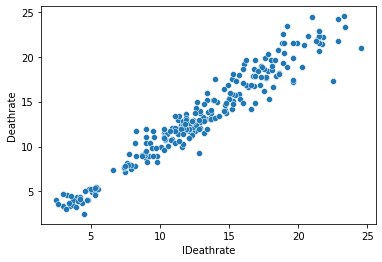

In [139]:
sns.scatterplot(x=sy_withlag['lDeathrate'], y=sy_withlag['Deathrate'])

Show that the current year ownership and previous year ownership are also highly correlated.

<AxesSubplot:xlabel='lHFR', ylabel='HFR'>

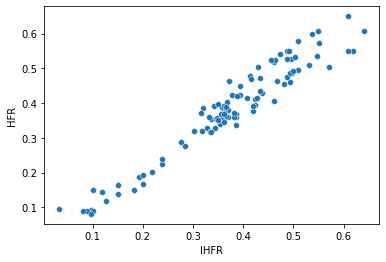

In [140]:
sns.scatterplot(x=sy_withlag['lHFR'], y=sy_withlag['HFR'])

As a result it's a bit tricky to know what is causing what here. It could be the case that current year ownership causes current year gun deaths (not vice versa), and we'd still see a positive correlation between previous year gun deaths and current year gun ownership.

A more precise way to test this is by looking at the change in gun ownership. We can compute this for years where we have both the current and lagged data.

In [141]:
sy_withlag['dHFR'] = sy_withlag['HFR'] - sy_withlag['lHFR']
sy_withlag['dDeathrate'] = sy_withlag['Deathrate'] - sy_withlag['lDeathrate']

In [142]:
smf.ols("dHFR ~ lDeathrate", data=sy_withlag).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dHFR   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.3884
Date:                Wed, 01 Dec 2021   Prob (F-statistic):              0.535
Time:                        10:52:48   Log-Likelihood:                 195.23
No. Observations:                 100   AIC:                            -386.5
Df Residuals:                      98   BIC:                            -381.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0038      0.010      0.378      0.707      -0.016       0.024
lDeathrate     0.0005      0.001      0.623      0.535      -0.001       0.002
==============================================================================
Omnibus:                        1.530   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                1.332
Skew:                           0.123   Prob(JB):                        0.514
Kurtosis:                       2.491   Cond. No.                         36.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is no magic bullet, but it doesn't seem that gun ownership tends to go up in paces that had more deaths in the previour year. 